In [1]:
# setup
import bq_helper

fatalities = bq_helper.BigQueryHelper(active_project='bigquery-public-data',
                                  dataset_name='nhtsa_traffic_fatalities')

**Questions**
1. Which hours of the day do the most accidents occur during?
2. Which state has the most hit and runs?

For this exercise, data from 2016 was used to answer both scavenger questions as it is more recent and contained more data than 2015. 

In [2]:
query1 = '''SELECT EXTRACT(HOUR FROM timestamp_of_crash) AS hour, COUNT(*) AS accidents
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
        GROUP BY 1
        ORDER BY 2 DESC
        '''

result1 = fatalities.query_to_pandas_safe(query1)
result1

,hour,accidents
0,18,1984
1,20,1919
2,17,1913
3,19,1902
4,16,1808
5,21,1801
6,15,1731
7,22,1650
8,0,1612
9,14,1567


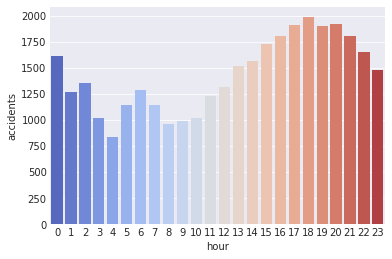

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
ax = sns.barplot(x='hour', y='accidents', data=result1, palette='coolwarm')

From the data, it's apparent that most accidents occur during hour 18 (6:00pm), with a record high of 1984 accidents in 2016 during the hour. On the other hand, hour 4 (4:00am) observed the lowest number of accidents, with 841 crashes. 

In [4]:
query2 = '''SELECT registration_state_name AS state, COUNT(hit_and_run) AS accidents
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016`
        WHERE hit_and_run = 'Yes'
        GROUP BY 1
        ORDER BY 2 DESC
        LIMIT 20
        '''
result2 = fatalities.query_to_pandas_safe(query2)
result2

,state,accidents
0,Unknown,929
1,California,167
2,Texas,107
3,Florida,94
4,Georgia,44
5,Illinois,43
6,North Carolina,39
7,Ohio,39
8,Pennsylvania,32
9,Michigan,32


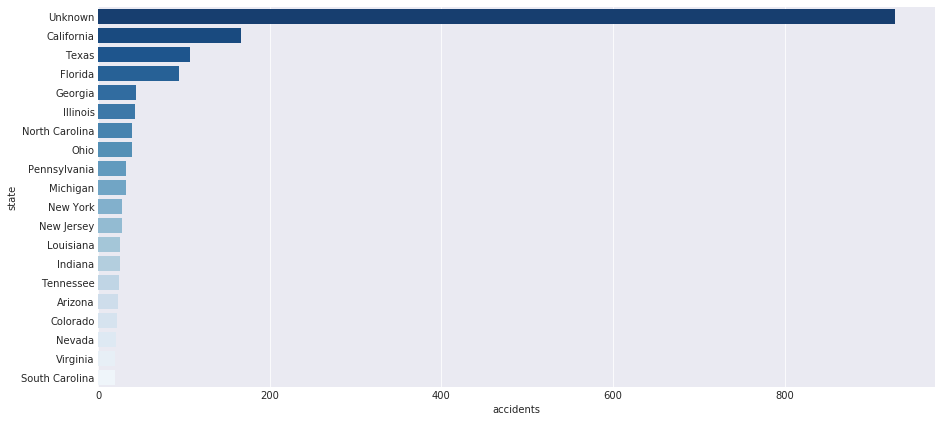

In [5]:
ax = plt.subplots(figsize=(15,7))
sns.set_style('darkgrid')
ax = sns.barplot(x='accidents', y='state', data=result2, palette='Blues_r')

The results of this query should be carefully considered due to the overwhelmingly high number of accidents with no known state. In other words, knowing the state names for all 'Unknown' accidents could greatly skew the results we have here. However on the basis of the data that we have at the present, the state of California observed the most number of accidents, while South Carolina recorded the smallest number.